**EDA-Exploratory Data Analysis**
---
Exploratory Data Analysis refers to the process of analyzing and summarizing a dataset to understand its structure, patterns, and key characteristics before building models.

**Step 1:** Importing all the required libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,log_loss

**Step 2**: Loding and Describing  the Dataset

In [2]:
# Load the Excel file to see its structure and content

data = pd.ExcelFile('A:\\excellr project\\Maintenance.xlsx')

# Display sheet names to understand the structure of the dataset
data.sheet_names

# Load the "Maintenance" sheet into a DataFrame
data = data.parse('Maintenance')

# Display the first few rows to inspect the data and identify potential cleaning needs
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

**Removing the unique ids from dataset**

In [3]:
# removing the unique ids from data
data = data.drop(['UDI', 'Product ID'], axis=1)
data

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

**Seperating  the Continuous data**

In [4]:
# seperating  the continuous data

X_cont = data[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
X_cont

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  
0            42.8                0  
1            46.3                3  
2            49.4                5  
3            39.5                7  
4            40.0                9  
...           ...              ...  
9995         29.5               14  
9996         31.8               17  
9997         33.4               22  
9998         48.5               25  
9999         40.2               30  

[10000 rows x 5 columns]

**Seperating the Categorical data**

In [5]:
# seperating the categorical data
X_cat = data[['Type','Machine failure','TWF','HDF','PWF','OSF','RNF']]
X_cat

Type  Machine failure  TWF  HDF  PWF  OSF  RNF
0       M                0    0    0    0    0    0
1       L                0    0    0    0    0    0
2       L                0    0    0    0    0    0
3       L                0    0    0    0    0    0
4       L                0    0    0    0    0    0
...   ...              ...  ...  ...  ...  ...  ...
9995    M                0    0    0    0    0    0
9996    H                0    0    0    0    0    0
9997    M                0    0    0    0    0    0
9998    H                0    0    0    0    0    0
9999    M                0    0    0    0    0    0

[10000 rows x 7 columns]

**Conclusion:** In the given dataset contains the 10000 rows and 12 columns, removing the unique columns not required for the further analysis and seperating the continuous data columns and categorical data columns

**---------------------------------------------------------------------------------------------------------------------------**

**Step 3** Cleaning the data

**3.1** Missing value detection and imputation

In [6]:
# Cleaning the data

# Identify columns with missing values
missing_values = data.isnull().sum()
print(missing_values)

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


**3.2** Duplicated records

In [7]:
# Duplicated records

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


**3.3** Detecting Outliers

In [8]:
# detecting the outliers for continuous data
# Calculate IQR for each X_cont column

for col in X_cont:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    num_outliers = len(outliers)

    print(f"Number of outliers in '{col}': {num_outliers}")

Number of outliers in 'Air temperature [K]': 0
Number of outliers in 'Process temperature [K]': 0
Number of outliers in 'Rotational speed [rpm]': 418
Number of outliers in 'Torque [Nm]': 69
Number of outliers in 'Tool wear [min]': 0


**Conclusion:** There is no missing values and duplicates values in the given data set, So no imputation is required.there is an outliers in Rotational speed [rpm] and Torque [Nm] columns required to imputate the Outliers 

**---------------------------------------------------------------------------------------------------------------------------**

**Data Visualization**
---

**Step 1** Histogram

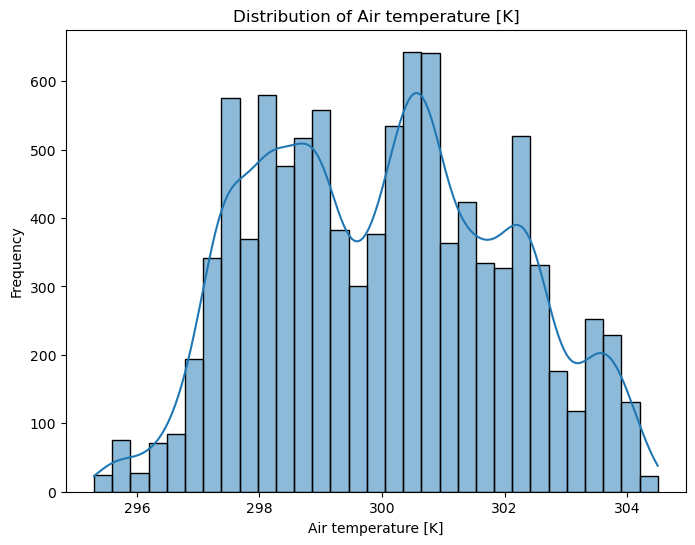

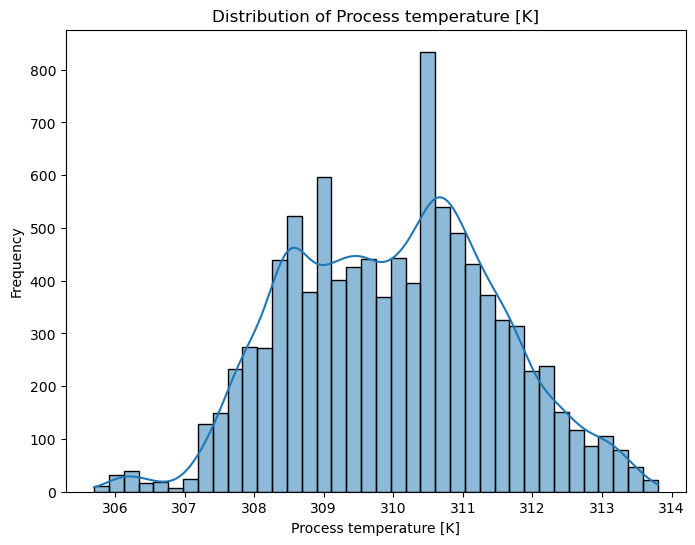

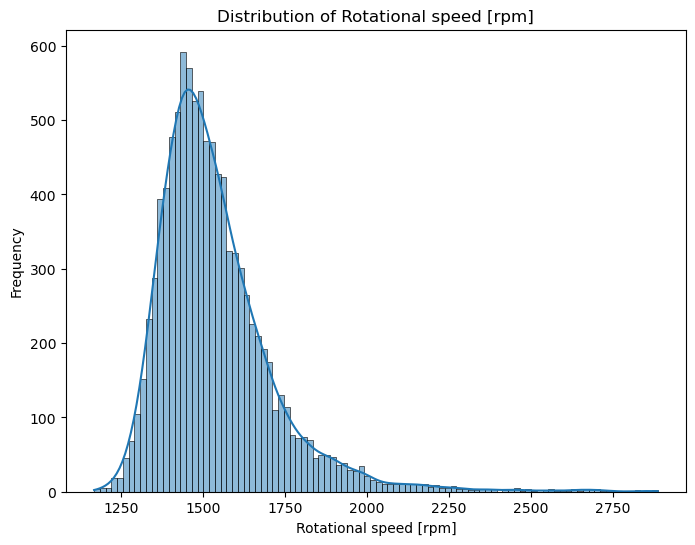

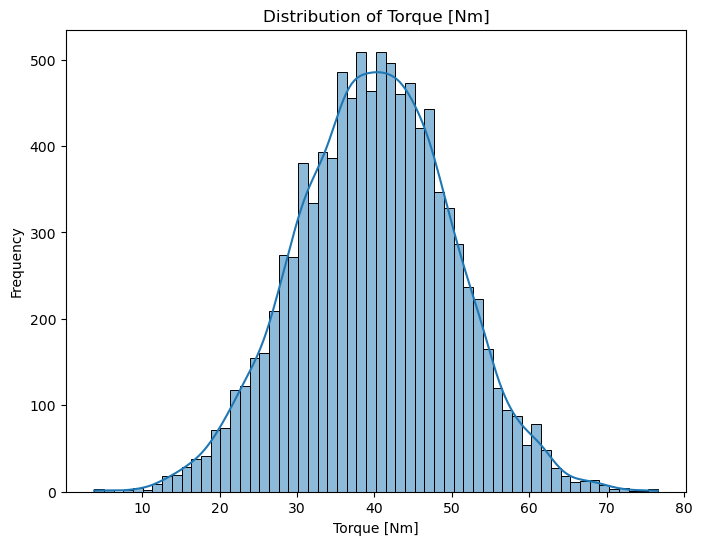

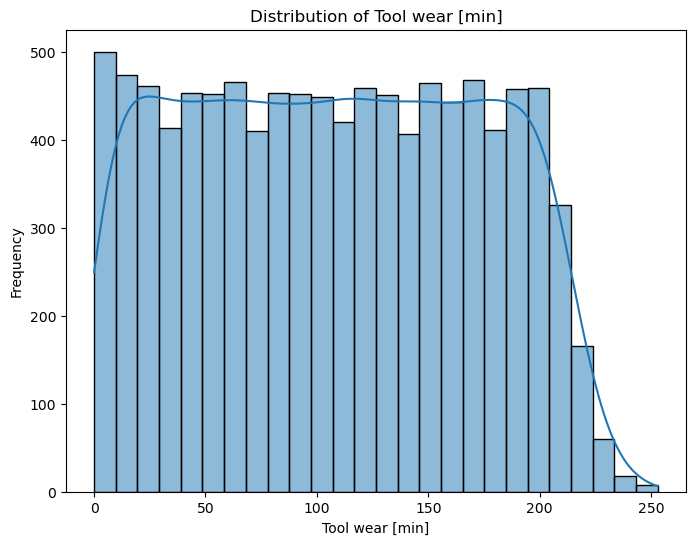

In [9]:
# Loop through X_cont data and create histograms with KDE
X_cont = data[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
X_cont
for col in X_cont.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(data[col], kde=True)  # Create histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Conclusion:** The histogram shows a right-skewed distribution, indicating that most values are concentrated in the lower range, with a few higher values creating the tail. There are no apparent outliers, and the data is unimodal.

**---------------------------------------------------------------------------------------------------------------------------**

**Step 2** Boxplot

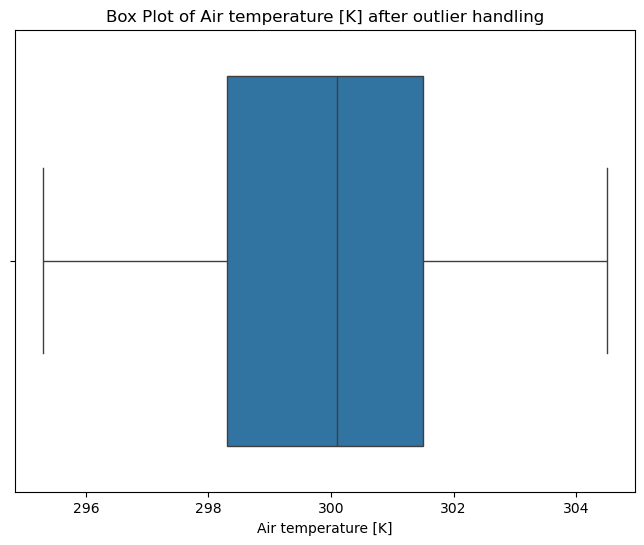

Column: Air temperature [K]
Lower Bound: 293.5, Upper Bound: 306.29999999999995
Number of outliers after replacing: 0
--------------------


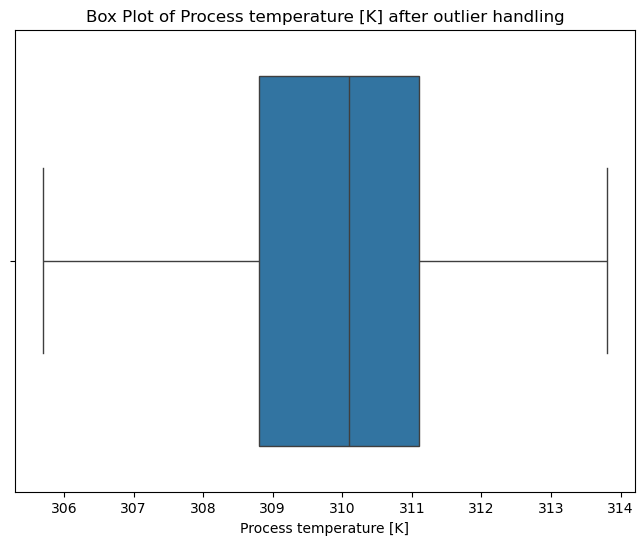

Column: Process temperature [K]
Lower Bound: 305.35, Upper Bound: 314.55000000000007
Number of outliers after replacing: 0
--------------------


C:\Users\dines\AppData\Local\Temp\ipykernel_23352\2908185216.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1139.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < lower_bound, col] = lower_bound


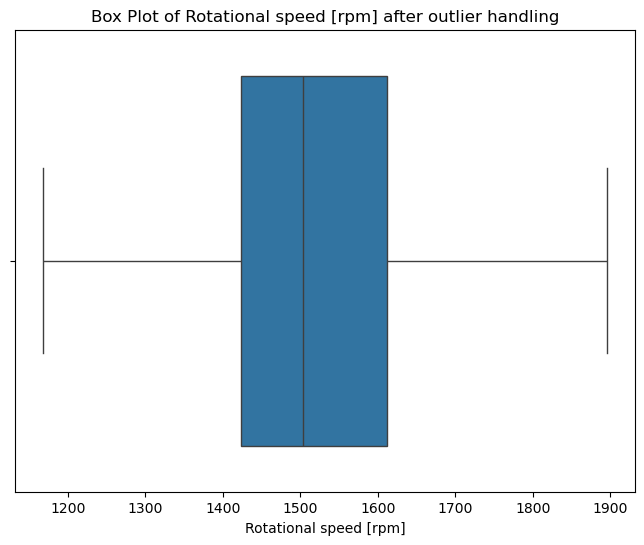

Column: Rotational speed [rpm]
Lower Bound: 1139.5, Upper Bound: 1895.5
Number of outliers after replacing: 0
--------------------


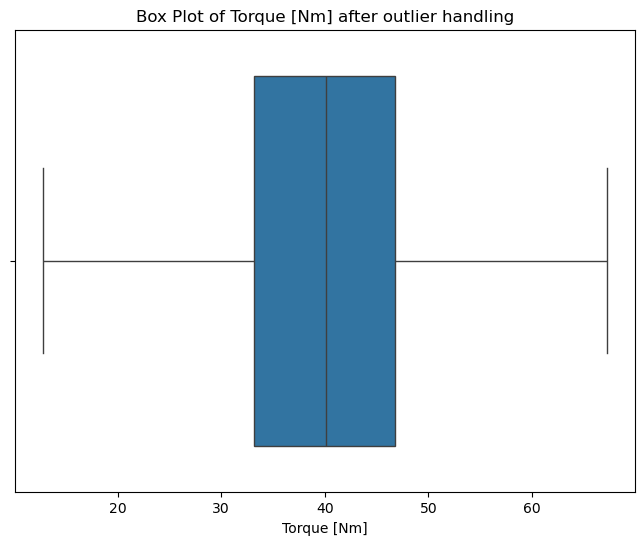

Column: Torque [Nm]
Lower Bound: 12.800000000000011, Upper Bound: 67.19999999999999
Number of outliers after replacing: 0
--------------------


C:\Users\dines\AppData\Local\Temp\ipykernel_23352\2908185216.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-110.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < lower_bound, col] = lower_bound


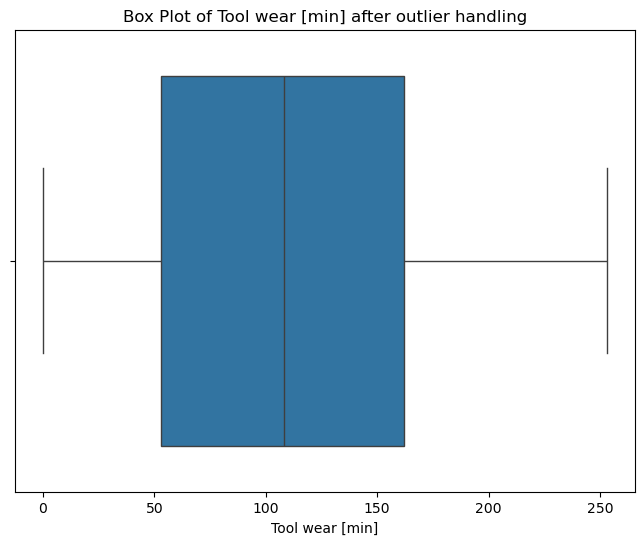

Column: Tool wear [min]
Lower Bound: -110.5, Upper Bound: 325.5
Number of outliers after replacing: 0
--------------------


In [10]:
# Replacing outliers with bounds value of IQR method

for col in X_cont.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers below the lower bound with the lower bound
    data.loc[data[col] < lower_bound, col] = lower_bound

    # Replace outliers above the upper bound with the upper bound
    data.loc[data[col] > upper_bound, col] = upper_bound

# Create box plot after outlier handling
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col} after outlier handling')
    plt.show()

    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of outliers after replacing: {num_outliers}")
    print("-" * 20)


**Conclusion:** Boxplot is used for detecting the outliers. I find the outliers in rotational speed and torque columns for that i  replaced the outliers with bound values and rechecking the outliers with boxplot .

**---------------------------------------------------------------------------------------------------------------------------**

**Step 3** Scatter plot

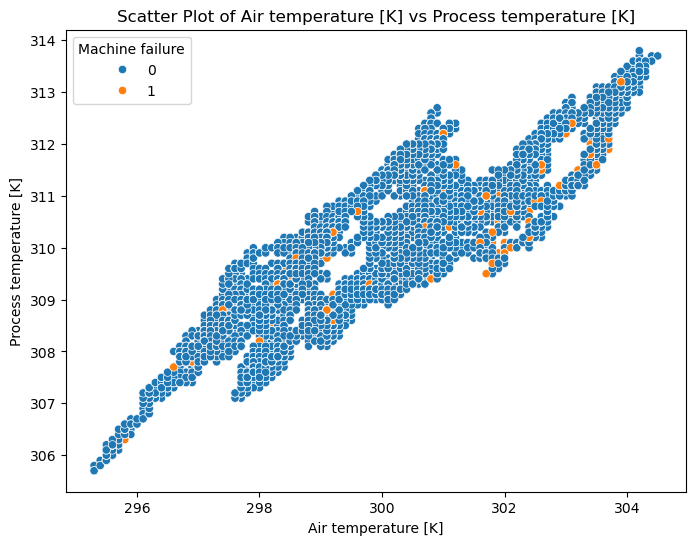

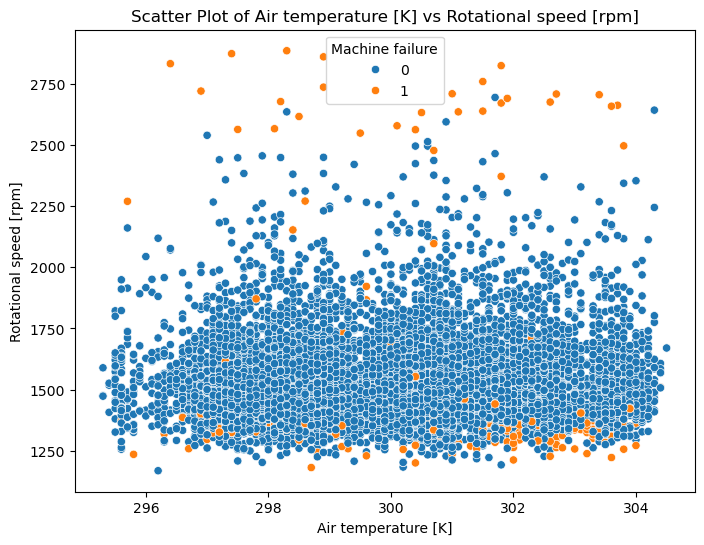

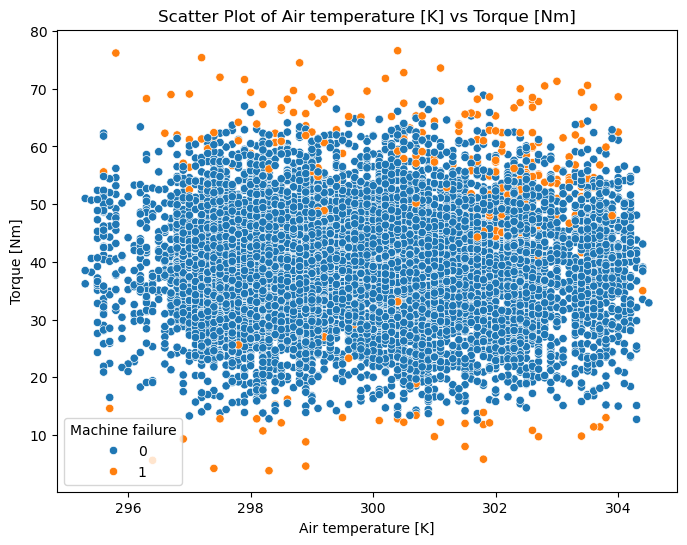

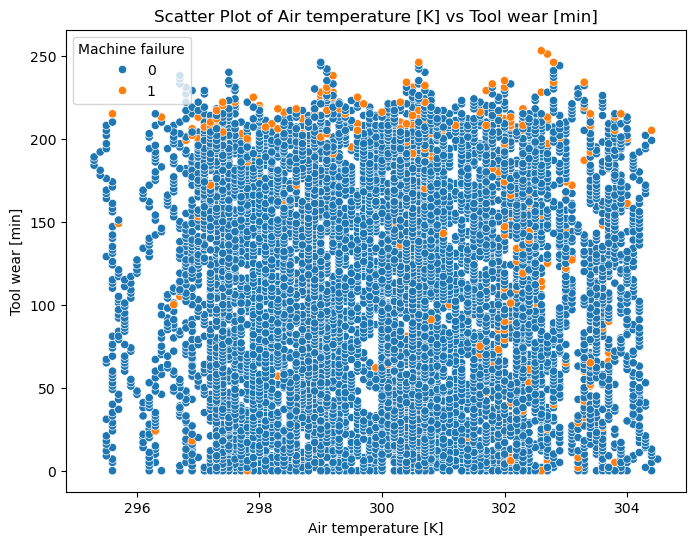

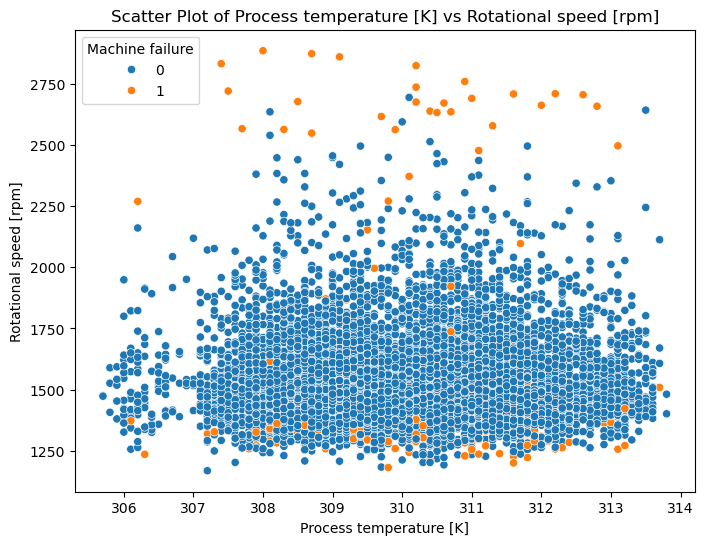

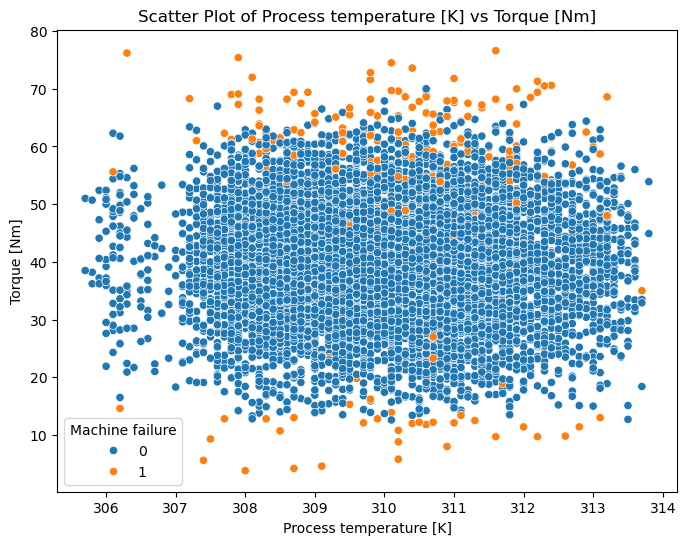

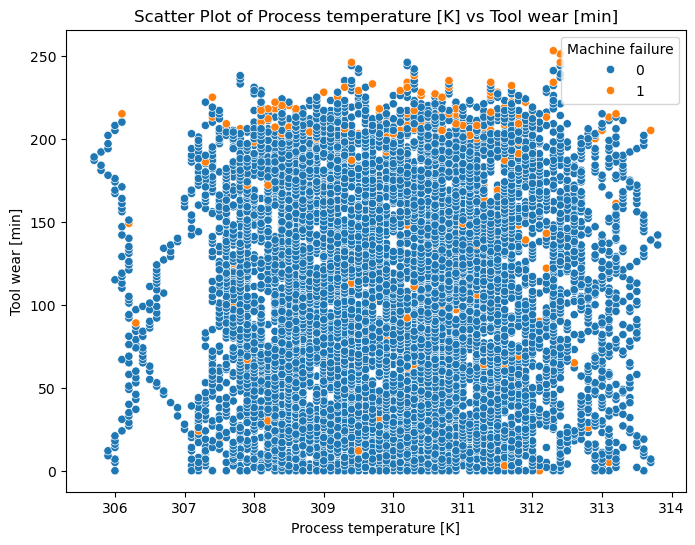

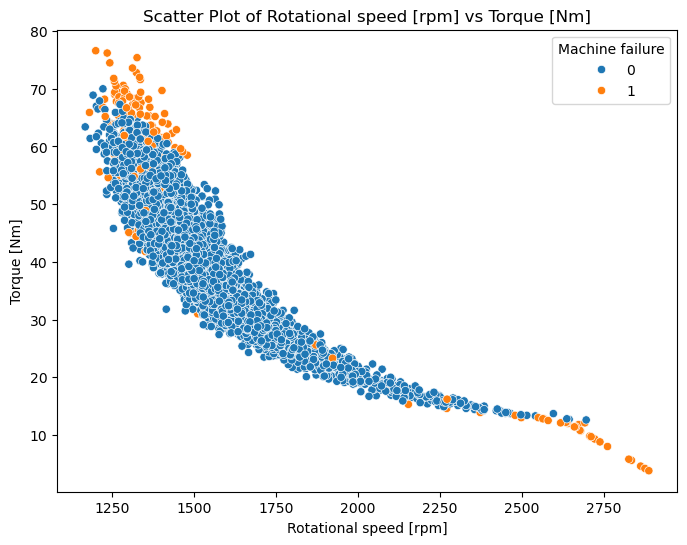

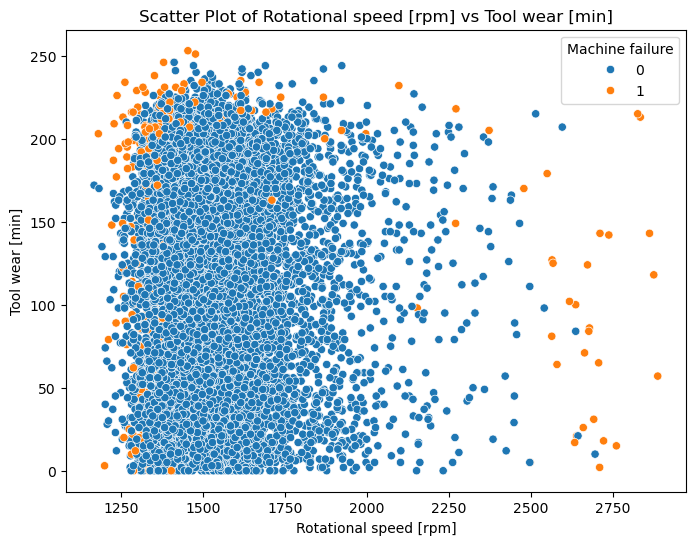

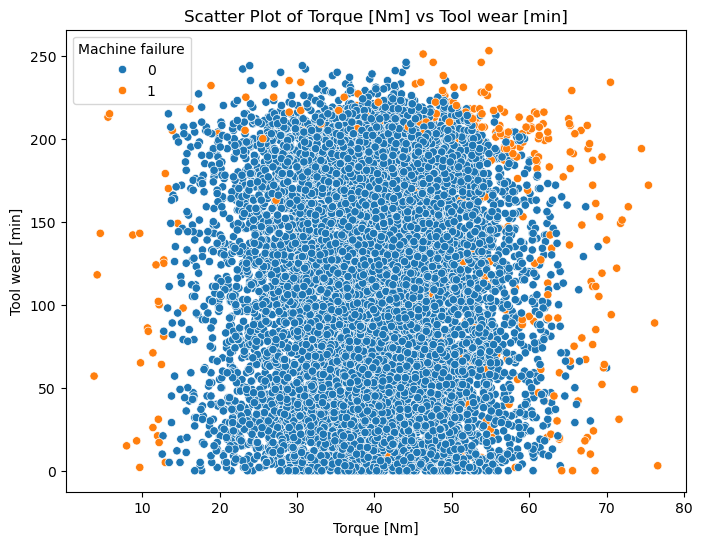

In [11]:
# defining target variable
Y = data['Machine failure']

# Loop through pairs of columns in X_cont and create scatter plots
for i in range(len(X_cont.columns)):
    for j in range(i + 1, len(X_cont.columns)):
        col1 = X_cont.columns[i]
        col2 = X_cont.columns[j]
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X_cont[col1], y=X_cont[col2], hue=Y, data=X_cont)
        plt.title(f'Scatter Plot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

**Conclusion:** Scatterplot is used to checks the relationships between the two continuous variables.  
    In the given data Air temperature and process temperature has the positive relationship.  
    Rotational speed and torque has Negative relationship.

**---------------------------------------------------------------------------------------------------------------------------**

**Step 4**  Pair plot

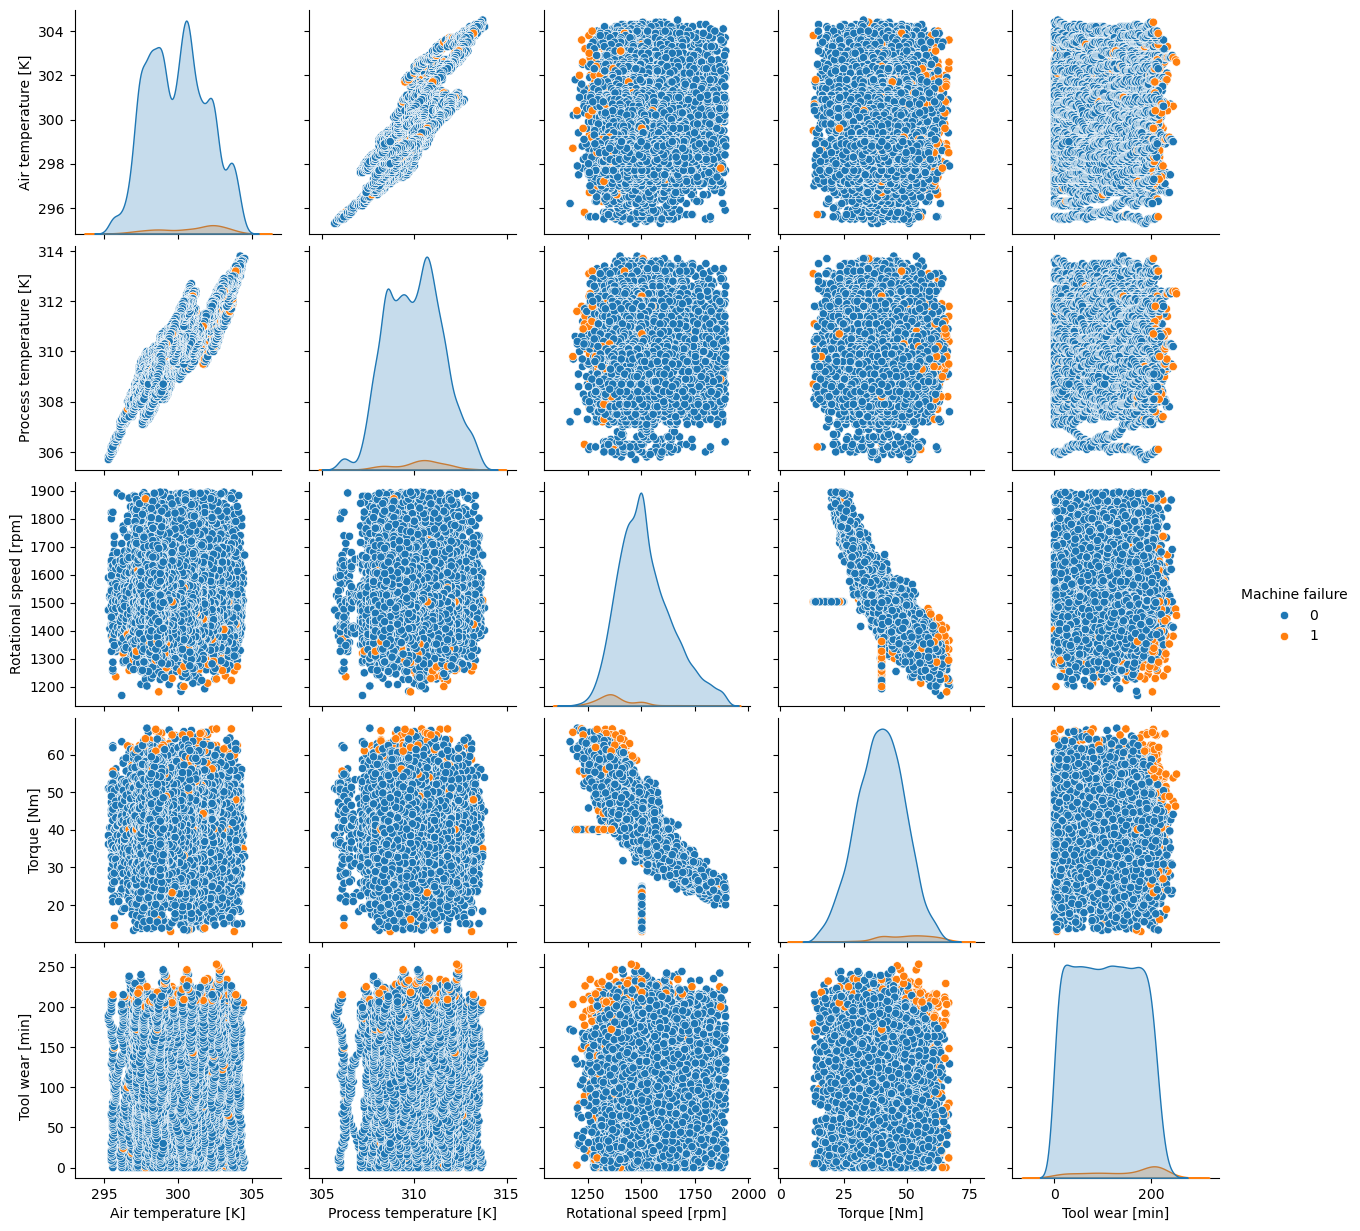

In [11]:
sns.pairplot(data=data, vars=X_cont.columns.tolist(), hue='Machine failure')
plt.show()

**Conclusion:** Pair plot is also used to checks the relationships for all continuous data in single graph

**---------------------------------------------------------------------------------------------------------------------------**

**Step 5** Correlation matrix

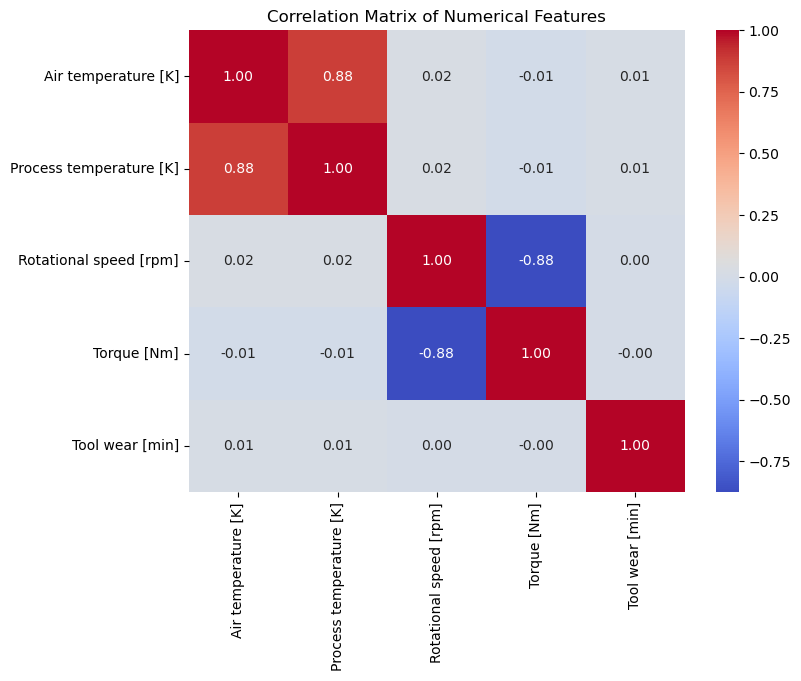

In [12]:
# Calculate the correlation matrix
correlation_matrix = X_cont.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Conclusion:** Correlation matrix will calculates the exact relationship between any two continuous variables and falls in between the range of +1 to -1

**---------------------------------------------------------------------------------------------------------------------------**

**Step 6** Bar plots

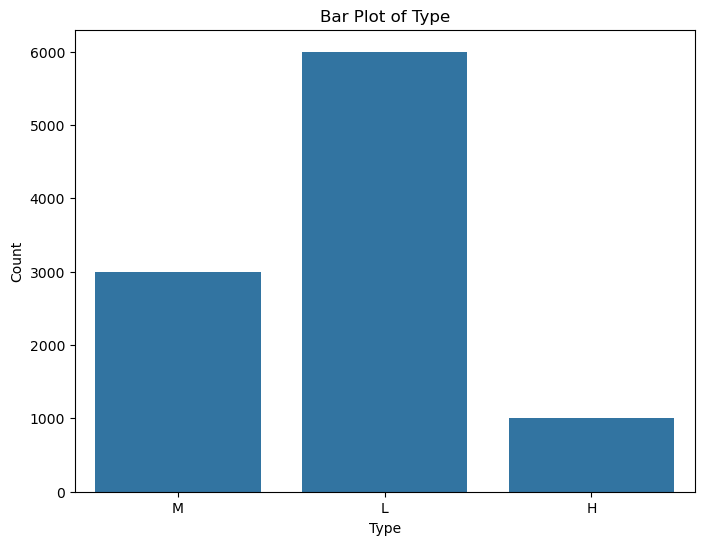

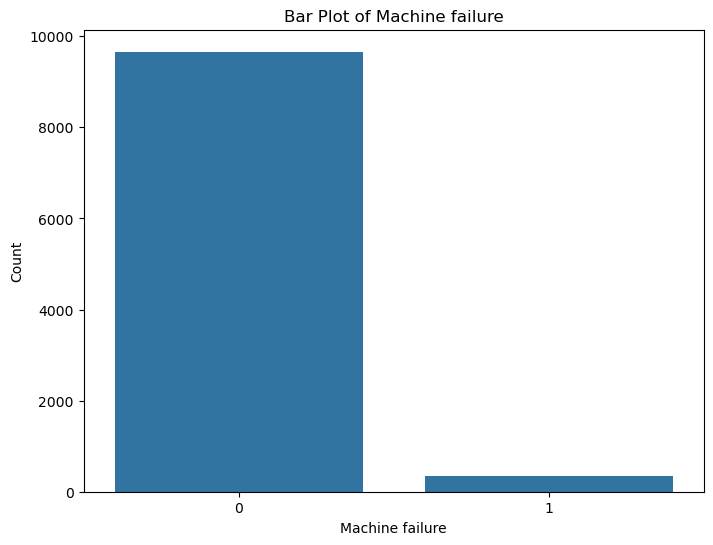

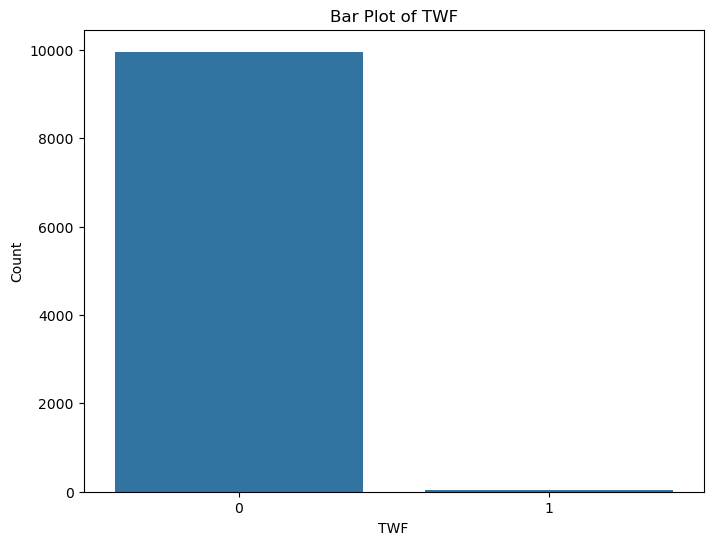

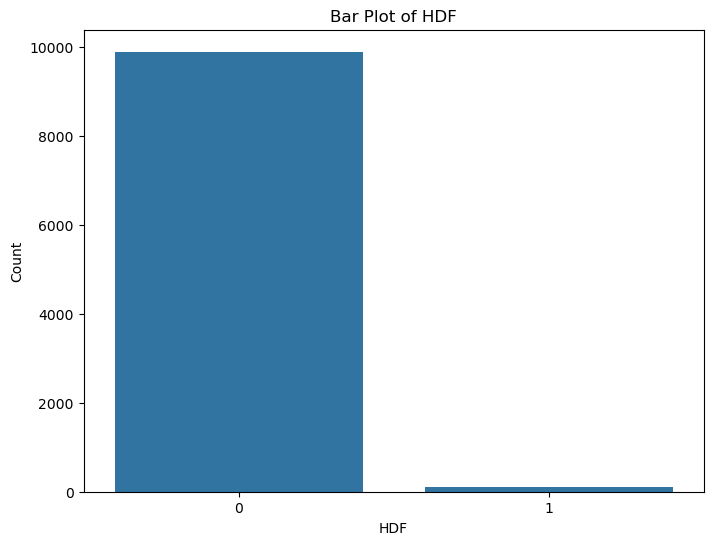

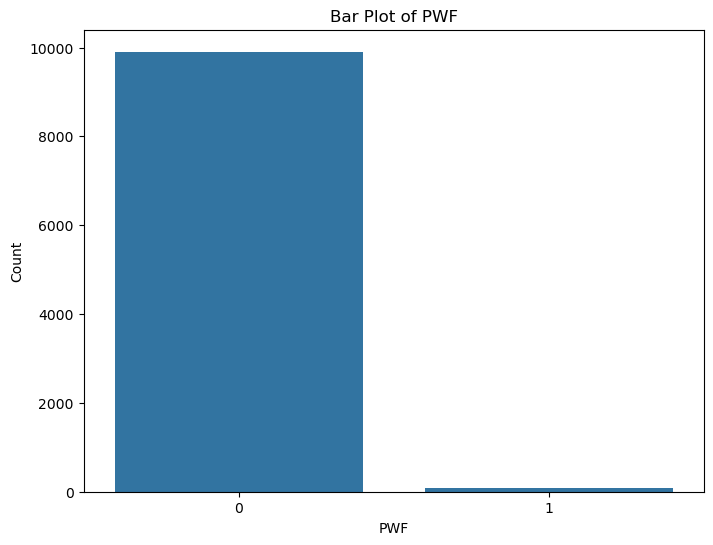

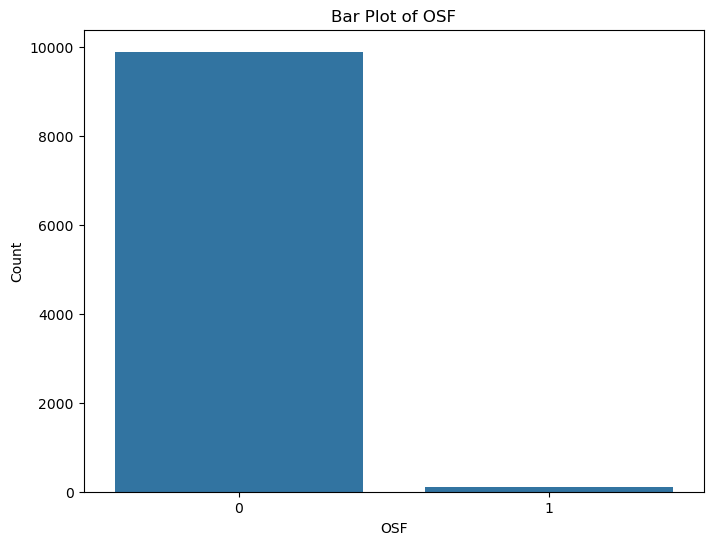

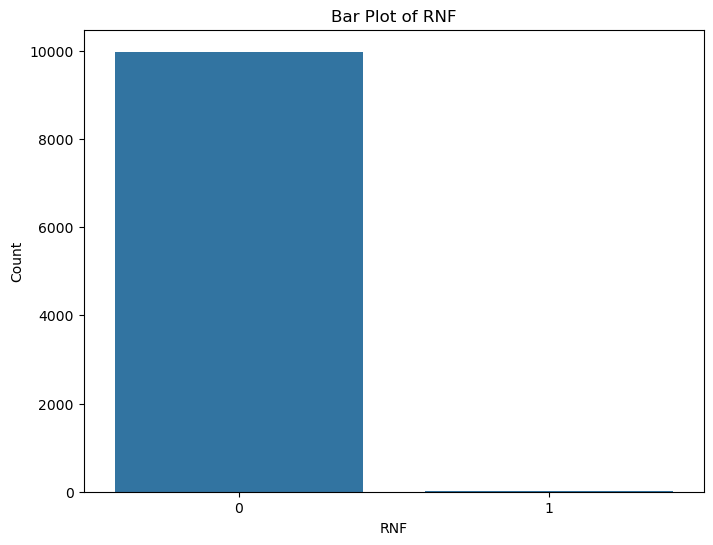

In [13]:
# Loop through each categorical column in X_cat and create bar plots
for col in X_cat.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=X_cat)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.show()

**Conclusion:** Bar graph is used for discrete variables where to compare between the categories of given variables

**---------------------------------------------------------------------------------------------------------------------------**

**Feature engineering**
---

**Step 1** Standardization

In [11]:
# standardization of X_cont data
scaler = StandardScaler()
data[X_cont.columns] = scaler.fit_transform(X_cont)
data

Type  Air temperature [K]  Process temperature [K]  \
0       M            -0.952389                -0.947360   
1       L            -0.902393                -0.879959   
2       L            -0.952389                -1.014761   
3       L            -0.902393                -0.947360   
4       L            -0.902393                -0.879959   
...   ...                  ...                      ...   
9995    M            -0.602417                -1.082162   
9996    H            -0.552421                -1.082162   
9997    M            -0.502425                -0.947360   
9998    H            -0.502425                -0.879959   
9999    M            -0.502425                -0.879959   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                   0.068185     0.282200        -1.695984                0   
1                  -0.729472     0.633308        -1.648852                0   
2                  -0.227450     0.944290        -1.617430                0   
3                  -0.590021    -0.048845        -1.586009                0   
4                  -0.729472     0.001313        -1.554588                0   
...                      ...          ...              ...              ...   
9995                0.363820    -1.052012        -1.476034                0   
9996                0.520005    -0.821283        -1.428902                0   
9997                0.592519    -0.660777        -1.350349                0   
9998               -0.729472     0.854005        -1.303217                0   
9999               -0.216294     0.021376        -1.224663                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

**Conclusion:** Standardization is one the technique of data transformation. Standardization is used only for Continuous data.  
It removes the units from the data and placing the whole data in -3 to +3 sigma range.  
Standardization uses the normalization formula.

**---------------------------------------------------------------------------------------------------------------------------**

**Step 2** label encoding

In [19]:
# label encoding of X_cat data
encoder = LabelEncoder()
data["Type"] = encoder.fit_transform(data["Type"])
data

Type  Air temperature [K]  Process temperature [K]  \
0        2            -0.952389                -0.947360   
1        1            -0.902393                -0.879959   
2        1            -0.952389                -1.014761   
3        1            -0.902393                -0.947360   
4        1            -0.902393                -0.879959   
...    ...                  ...                      ...   
9995     2            -0.602417                -1.082162   
9996     0            -0.552421                -1.082162   
9997     2            -0.502425                -0.947360   
9998     0            -0.502425                -0.879959   
9999     2            -0.502425                -0.879959   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                   0.068185     0.282200        -1.695984                0   
1                  -0.729472     0.633308        -1.648852                0   
2                  -0.227450     0.944290        -1.617430                0   
3                  -0.590021    -0.048845        -1.586009                0   
4                  -0.729472     0.001313        -1.554588                0   
...                      ...          ...              ...              ...   
9995                0.363820    -1.052012        -1.476034                0   
9996                0.520005    -0.821283        -1.428902                0   
9997                0.592519    -0.660777        -1.350349                0   
9998               -0.729472     0.854005        -1.303217                0   
9999               -0.216294     0.021376        -1.224663                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

**Conclusion:** Label encoding is also the technique of data transformation.  
   It is applicable for categorical discrete data. it encodes the data in numerical numbers defaultly numbering starts with 0,1,2.....  
   In the given data set type column is applicable for label encoding.

**---------------------------------------------------------------------------------------------------------------------------**

In [21]:
# Separate features (X) and target variable (Y)
Y = data['Machine failure']
X = data.drop('Machine failure', axis=1)

**Step 3**. Data partition

In [20]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # random_state for reproducibility

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


**Conclusion:** Data partition is used to divide the data for training and testing purpose before building the model.  
        The data is partitioned in training data 80% and testing data 20%                                               

**---------------------------------------------------------------------------------------------------------------------------**

**Model building**
---

**Model-1** LogisticRegression

In [30]:
# Initialize the LogisticRegression
model_le = LogisticRegression()

training_err = []
test_err = []
train_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    model_le.fit(X_train,Y_train)
    Y_pred_train = model_le.predict(X_train)
    Y_pred_test = model_le.predict(X_test)
    training_err.append(log_loss(Y_train,Y_pred_train))
    test_err.append(log_loss(Y_test,Y_pred_test))
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_accuracy),2))
print("Cross validation test score:", np.round(np.mean(test_accuracy),2))


Cross validation traning error: 0.04
Cross validation test error: 0.04
Cross validation traning score: 1.0
Cross validation test score: 1.0


**Classification report and ROC curve for Logistic Regression**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.96      0.98       102

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000



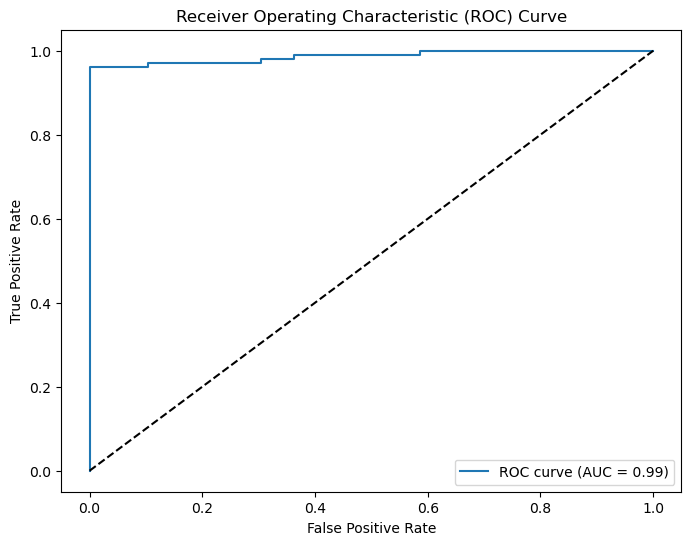

In [32]:

from sklearn.metrics import classification_report

# Assuming you have already trained your model (model_le) and have Y_test and Y_pred_test
Y_pred_test = model_le.predict(X_test) # Make sure you have this prediction

print(classification_report(Y_test, Y_pred_test))


from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your model (model_le) and have X_test and Y_test

# Get predicted probabilities for the positive class
y_probs = model_le.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Conclusion:** Logistic regression successfully classified the outcomes with a good accuracy score. However, the performance can degrade with non-linear patterns in the data. It is crucial to preprocess data effectively.  
    ROC curve gives the over all performance with 99 % Accuracy for test data prediction  
    Classification report of logistic regression gives best precision and recall for class0 and class1

**---------------------------------------------------------------------------------------------------------------------------**

**Model-2** DecisionTreeClassifier

In [36]:

# Initialize the DecisionTree classifier
model_de = DecisionTreeClassifier()

training_err = []
test_err = []
train_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    model_de.fit(X_train,Y_train)
    Y_pred_train = model_de.predict(X_train)
    Y_pred_test = model_de.predict(X_test)
    training_err.append(log_loss(Y_train,Y_pred_train))
    test_err.append(log_loss(Y_test,Y_pred_test))
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_accuracy),2))
print("Cross validation test score:", np.round(np.mean(test_accuracy),2))

# Get the number of nodes and depth of the decision tree
n_nodes = model_de.tree_.node_count
depth = model_de.tree_.max_depth

print("Number of nodes:", n_nodes)
print("Depth of the tree:", depth)

Cross validation traning error: 0.0
Cross validation test error: 0.08
Cross validation traning score: 1.0
Cross validation test score: 1.0
Number of nodes: 49
Depth of the tree: 12


**Classification report and ROC curve for Decision tree classifier**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.96      0.98       102

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000



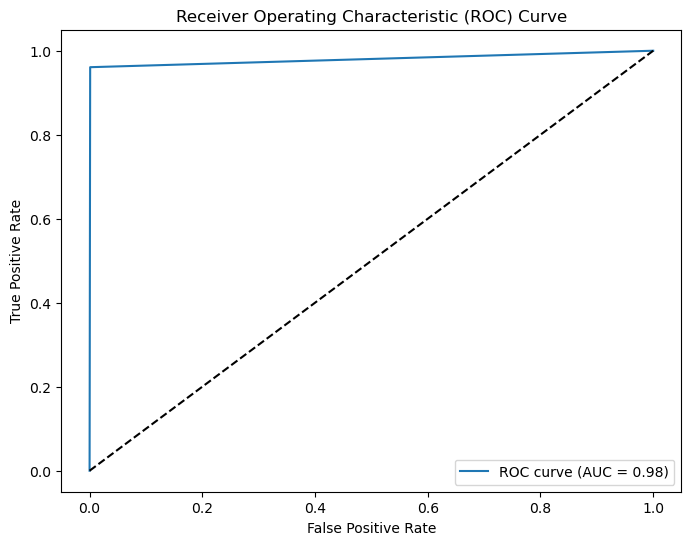

In [38]:
from sklearn.metrics import classification_report

# Assuming you have already trained your model and have Y_test and Y_pred_test
Y_pred_test = model_le.predict(X_test) # Make sure you have this prediction

print(classification_report(Y_test, Y_pred_test))

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your model (model_le) and have X_test and Y_test

# Get predicted probabilities for the positive class
y_probs = model_de.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Conclusuion:** the Decision tree classifier gives best acuuracy score for both testing and training but the varience difference in test error and train error is 0.08,while compare to logistic regression decision tree has high varience difference.  
ROC Curve gives overall performance with 0.98 accuracyfor test data prediction

**---------------------------------------------------------------------------------------------------------------------------**

**Model-3** KNeighbors Classifier

In [35]:

# Initialize the KNN classifier with k=5 (you can change this value)
model_kn = KNeighborsClassifier(n_neighbors=5)

training_err = []
test_err = []
train_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    model_kn.fit(X_train,Y_train)
    Y_pred_train = model_kn.predict(X_train)
    Y_pred_test = model_kn.predict(X_test)
    training_err.append(log_loss(Y_train,Y_pred_train))
    test_err.append(log_loss(Y_test,Y_pred_test))
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_accuracy),2))
print("Cross validation test score:", np.round(np.mean(test_accuracy),2))

Cross validation traning error: 0.17
Cross validation test error: 0.26
Cross validation traning score: 1.0
Cross validation test score: 0.99


**Classification report and ROC curve for KNeighbors classifier**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2898
           1       1.00      0.76      0.87       102

    accuracy                           0.99      3000
   macro avg       1.00      0.88      0.93      3000
weighted avg       0.99      0.99      0.99      3000



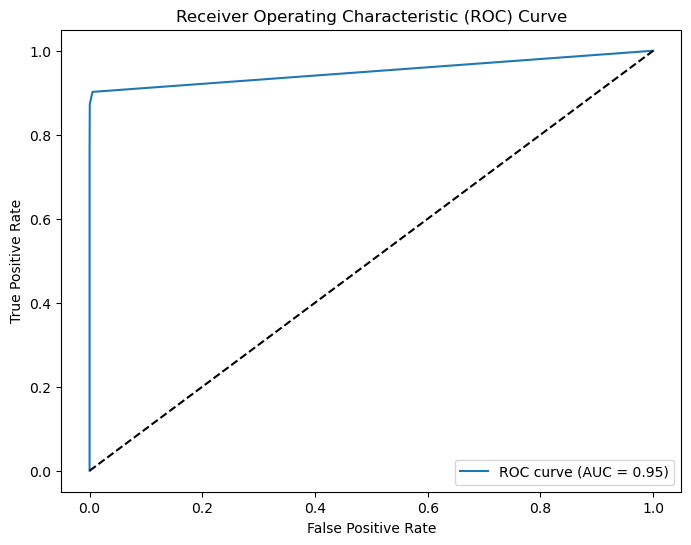

In [39]:
from sklearn.metrics import classification_report

# Assuming you have already trained your model and have Y_test and Y_pred_test
Y_pred_test = model_kn.predict(X_test) # Make sure you have this prediction 

print(classification_report(Y_test, Y_pred_test))

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your model (model_le) and have X_test and Y_test

# Get predicted probabilities for the positive class
y_probs = model_kn.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Conclusuion:** the KNN classifier gives best acuuracy score for both testing and training but the varience difference in test error and train error is 0.09,while compare to logistic regression KNN Classifier has high varience difference.  
ROC Curve gives overall performance with 0.95 accuracy for test data prediction


**---------------------------------------------------------------------------------------------------------------------------**

**Model-4** Support Vector Machine

In [40]:

# Initialize the SVM classifier
model_svm = SVC(kernel='rbf')


training_err = []
test_err = []
train_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    model_svm.fit(X_train,Y_train)
    Y_pred_train = model_svm.predict(X_train)
    Y_pred_test = model_svm.predict(X_test)
    training_err.append(log_loss(Y_train,Y_pred_train))
    test_err.append(log_loss(Y_test,Y_pred_test))
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_accuracy),2))
print("Cross validation test score:", np.round(np.mean(test_accuracy),2))

Cross validation traning error: 0.04
Cross validation test error: 0.06
Cross validation traning score: 1.0
Cross validation test score: 1.0


**Classification report and ROC curve for Support vector classifier**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.95      0.97       102

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000



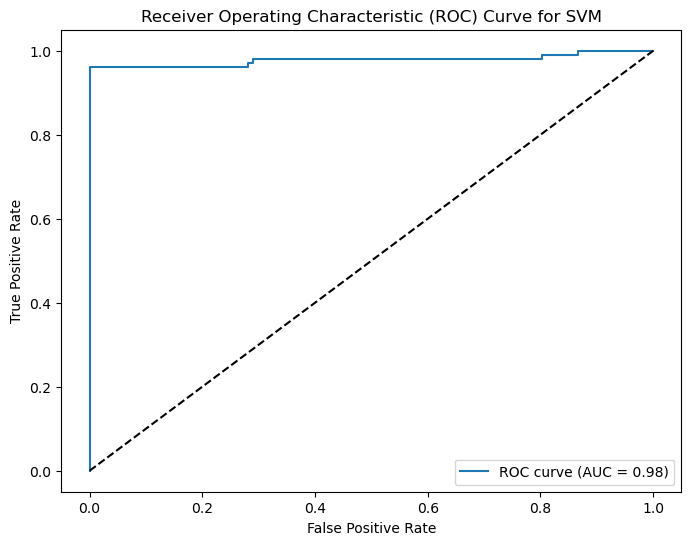

In [41]:

from sklearn.metrics import classification_report

# Assuming you have already trained your model and have Y_test and Y_pred_test
Y_pred_test = model_svm.predict(X_test) # Make sure you have this prediction 

print(classification_report(Y_test, Y_pred_test))

from sklearn.metrics import roc_curve, roc_auc_score

# Get decision function values (scores) for each sample
y_scores = model_svm.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()


**Conclusuion:** the SVM classifier gives best acuuracy score for both testing and training but the varience difference in test error and train error is 0.02,while compare to logistic regression SVM Classifier has high varience difference.  
ROC Curve gives overall performance with 0.98 accuracy for test data prediction

**---------------------------------------------------------------------------------------------------------------------------**

**Model-5** Naive bayes classifier

In [42]:

# Create a GaussianNB classifier
model_nb = GaussianNB()

training_err = []
test_err = []
train_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    model_nb.fit(X_train,Y_train)
    Y_pred_train = model_nb.predict(X_train)
    Y_pred_test = model_nb.predict(X_test)
    training_err.append(log_loss(Y_train,Y_pred_train))
    test_err.append(log_loss(Y_test,Y_pred_test))
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_accuracy),2))
print("Cross validation test score:", np.round(np.mean(test_accuracy),2))


Cross validation traning error: 0.08
Cross validation test error: 0.08
Cross validation traning score: 1.0
Cross validation test score: 1.0


**Classification report and ROC curve for Naive bayes classifier**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.96      0.98       102

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000



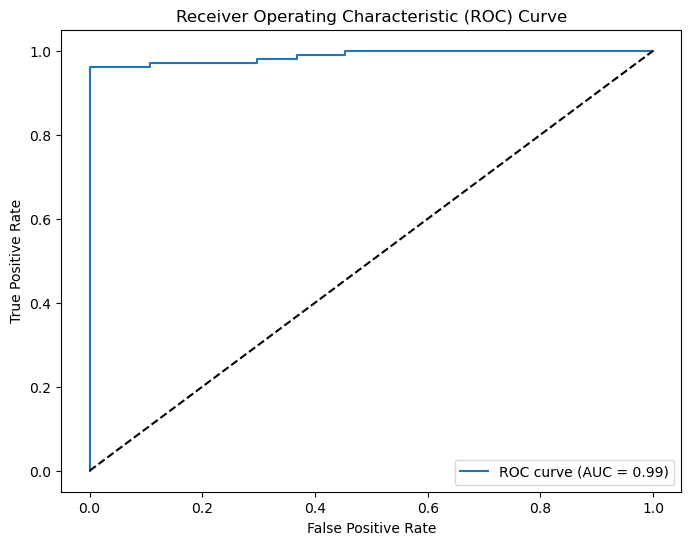

In [43]:

from sklearn.metrics import classification_report

# Assuming you have already trained your model and have Y_test and Y_pred_test
Y_pred_test = model_nb.predict(X_test) # Make sure you have this prediction 

print(classification_report(Y_test, Y_pred_test))

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your model (model_le) and have X_test and Y_test

# Get predicted probabilities for the positive class
y_probs = model_nb.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Conclusuion:** the Naive bayes classifier gives best acuuracy score for both testing and training there is no  varience difference in test error and train error but in  logistic regression test error and train error less than naive bayes classifier.  
ROC Curve gives overall performance with 0.99 accuracy for test data prediction.

**---------------------------------------------------------------------------------------------------------------------------**

**Model-6** Random Forest Classifier

In [44]:
# Create a RandomForest classifier
model_rf = RandomForestClassifier(n_estimators=100)

training_err = []
test_err = []
train_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    model_rf.fit(X_train,Y_train)
    Y_pred_train = model_rf.predict(X_train)
    Y_pred_test = model_rf.predict(X_test)
    training_err.append(log_loss(Y_train,Y_pred_train))
    test_err.append(log_loss(Y_test,Y_pred_test))
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_accuracy),2))
print("Cross validation test score:", np.round(np.mean(test_accuracy),2))


Cross validation traning error: 0.0
Cross validation test error: 0.03
Cross validation traning score: 1.0
Cross validation test score: 1.0


**Classification report and ROC curve for Random forest classifier**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.96      0.98       102

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000



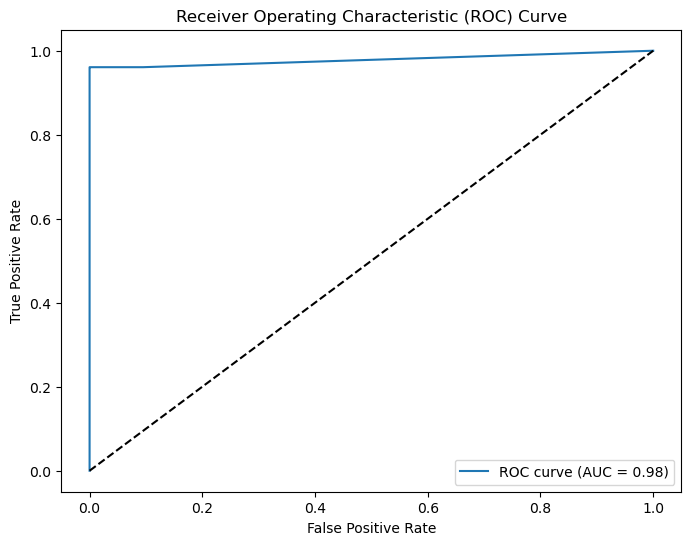

In [45]:

from sklearn.metrics import classification_report

# Assuming you have already trained your model and have Y_test and Y_pred_test
Y_pred_test = model_rf.predict(X_test) # Make sure you have this prediction 

print(classification_report(Y_test, Y_pred_test))

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your model (model_le) and have X_test and Y_test

# Get predicted probabilities for the positive class
y_probs = model_rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Conclusuion:** the Random forest classifier gives best acuuracy score for both testing and training but the varience difference in test error and train error is 0.02,while compare to logistic regression Random forest Classifier has high varience difference.  
ROC Curve gives overall performance with 0.98 accuracy for test data prediction.

**---------------------------------------------------------------------------------------------------------------------------**

**Model-7** Gradient Boosting Classifier

In [46]:
# Create a GradientBoosting classifier
model_gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)

training_err = []
test_err = []
train_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    model_gb.fit(X_train,Y_train)
    Y_pred_train = model_gb.predict(X_train)
    Y_pred_test = model_gb.predict(X_test)
    training_err.append(log_loss(Y_train,Y_pred_train))
    test_err.append(log_loss(Y_test,Y_pred_test))
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_accuracy),2))
print("Cross validation test score:", np.round(np.mean(test_accuracy),2))

Cross validation traning error: 0.03
Cross validation test error: 0.07
Cross validation traning score: 1.0
Cross validation test score: 1.0


**Classification report and ROC curve for Gradient Boosting classifier**

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2898
           1       0.84      0.96      0.90       102

    accuracy                           0.99      3000
   macro avg       0.92      0.98      0.95      3000
weighted avg       0.99      0.99      0.99      3000



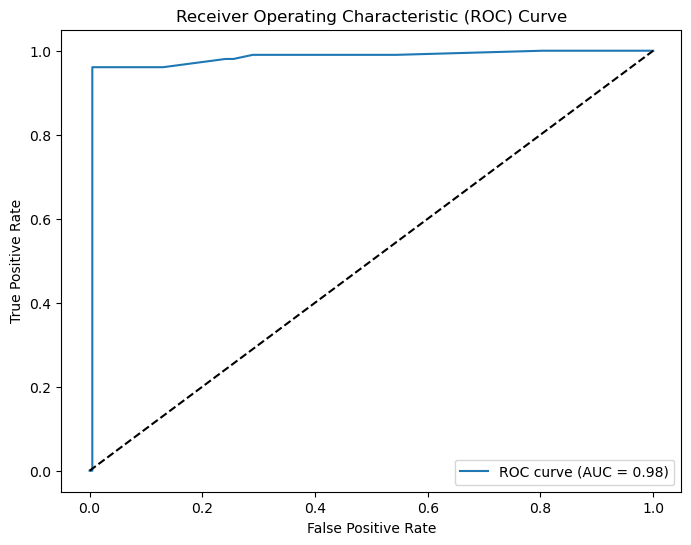

In [47]:

from sklearn.metrics import classification_report

# Assuming you have already trained your model and have Y_test and Y_pred_test
Y_pred_test = model_gb.predict(X_test) # Make sure you have this prediction 

print(classification_report(Y_test, Y_pred_test))

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your model (model_le) and have X_test and Y_test

# Get predicted probabilities for the positive class
y_probs = model_gb.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Conclusuion:** the Gradient Boosting classifier gives best acuuracy score for both testing and training but the varience difference in test error and train error is 0.03,while compare to logistic regression Gradient Boosting Classifier has high varience difference.  
ROC Curve gives overall performance with 0.98 accuracy for test data prediction

**---------------------------------------------------------------------------------------------------------------------------**

**Evaluation of Best Model**
---

**Model Performance Comparison**

In [49]:
import pandas as pd

# Define model performance metrics
model_performance = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "KNN",],
    "Test Accuracy": [1.00, 1.00, 1.00, 1.00, 0.99],
    "Precision (Failure)": [1.00, 1.00, 1.00, 0.84, 1.00],
    "Recall (Failure)": [0.96, 0.96, 0.96, 0.96, 0.76],
    "F1-Score (Failure)": [0.98, 0.98, 0.98, 0.90, 0.87]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Sort by Accuracy, Precision, Recall, and F1-Score for better visualization
sorted_df = performance_df.sort_values(by="F1-Score (Failure)", ascending=False)

# Display the performance of models
print("Model Performance Comparison:\n")
print(sorted_df)

# Identify the best model
best_model = sorted_df.iloc[0]
print("\nBest Model for Predictive Maintenance:")
print(f"Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Test Accuracy']}")
print(f"Precision (Failure): {best_model['Precision (Failure)']}")
print(f"Recall (Failure): {best_model['Recall (Failure)']}")
print(f"F1-Score (Failure): {best_model['F1-Score (Failure)']}")


Model Performance Comparison:

                 Model  Test Accuracy  Precision (Failure)  Recall (Failure)  \
0  Logistic Regression           1.00                 1.00              0.96   
1        Decision Tree           1.00                 1.00              0.96   
2        Random Forest           1.00                 1.00              0.96   
3    Gradient Boosting           1.00                 0.84              0.96   
4                  KNN           0.99                 1.00              0.76   

   F1-Score (Failure)  
0                0.98  
1                0.98  
2                0.98  
3                0.90  
4                0.87  

Best Model for Predictive Maintenance:
Model: Logistic Regression
Accuracy: 1.0
Precision (Failure): 1.0
Recall (Failure): 0.96
F1-Score (Failure): 0.98


**Conclusion:** by all the models, logistic regression algorithm is best model for predictive maintenance because logistic regression works only when the target variable is in binary form and it gives best accuracy for both training and testing with no varience gap between them.  
by the over all performance of ROC curve gives 0.99 best accuracy while compare to other models.  
In classification report the F1-Score is also gives high Score for class1 and class0.  
So logistic regression model is best to deployment for the Predictive Maintenance of Machine Failure.

**---------------------------------------------------------------------------------------------------------------------------**

**Model Evaluation Graph**

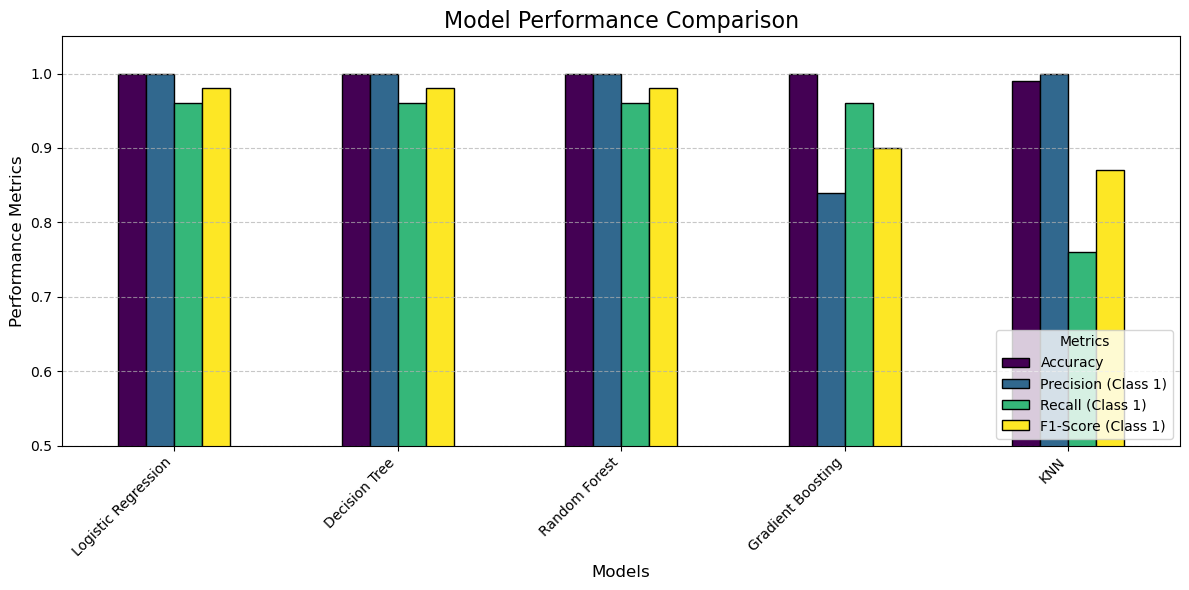

In [50]:
# Data for the models and their metrics
metrics = ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)"]
model_performance = {
    "Logistic Regression": [1.00, 1.00, 0.96, 0.98],
    "Decision Tree": [1.00, 1.00, 0.96, 0.98],
    "Random Forest": [1.00, 1.00, 0.96, 0.98],
    "Gradient Boosting": [1.00, 0.84, 0.96, 0.90],
    "KNN": [0.99, 1.00, 0.76, 0.87],
    
}

# Convert dictionary to DataFrame
performance_df = pd.DataFrame(model_performance, index=metrics)

# Transpose for easier plotting
performance_df = performance_df.T

# Plot the metrics in a single bar chart
ax = performance_df.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Performance Metrics", fontsize=12)
plt.ylim(0.5, 1.05)  # Adjust y-axis range for better visualization
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Metrics", fontsize=10, loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

**Deployment the model**
---

In [23]:
import pickle
filename = 'trained_model.pkl'
pickle.dump(model_le, open(filename, 'wb'))

# Assuming `scaler` and `encoder` are already fitted objects:
scaler_filename = 'scaler.pkl'
encoder_filename = 'encoder.pkl'

# Save the scaler
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
